In [1]:
#!pip install foolbox


In [2]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import foolbox as fb
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install tensorflow[and-cuda]==2.18

2024-12-10 18:43:40.911241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733874220.929069  466002 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733874220.934568  466002 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 18:43:40.952399: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Defaulting to user installation because normal site-packages is not writeable


In [3]:
@tf.keras.utils.register_keras_serializable(package="Custom")
def focal_loss(alpha=1, gamma=0):
    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to prevent log(0)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Compute cross-entropy loss
        ce_loss = - (y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))

        # Compute the focal loss scaling factor
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal_factor = K.pow(1 - p_t, gamma)

        # Compute the focal loss
        focal_loss_value = alpha * focal_factor * ce_loss

        # Return the mean loss over the batch
        return K.mean(focal_loss_value)

    focal_loss_fixed.__name__ = 'focal_loss_fixed'  # Important to set the name for serialization
    return focal_loss_fixed

2024-12-10 18:43:51.055352: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NOT_INITIALIZED: initialization error
2024-12-10 18:43:51.055440: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: udc-an34-7
2024-12-10 18:43:51.055448: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: udc-an34-7
2024-12-10 18:43:51.055637: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.54.14
2024-12-10 18:43:51.055667: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.54.14
2024-12-10 18:43:51.055672: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.54.14


Evaluating model: best_model_transfer_A_to_D.keras
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


I0000 00:00:1733875163.692485  466121 service.cc:148] XLA service 0x7f225401f650 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733875163.692556  466121 service.cc:156]   StreamExecutor device (0): Host, Default Version
2024-12-10 18:59:23.854485: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733875164.211778  466121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step
Classification Report on Adversarial Test Set D:
              precision    recall  f1-score   support

   Uncracked       0.91      0.36      0.52      1160
     Cracked       0.10      0.68      0.18       126

    accuracy                           0.39      1286
   macro avg       0.51      0.52      0.35      1286
weighted avg       0.83      0.39      0.48      1286



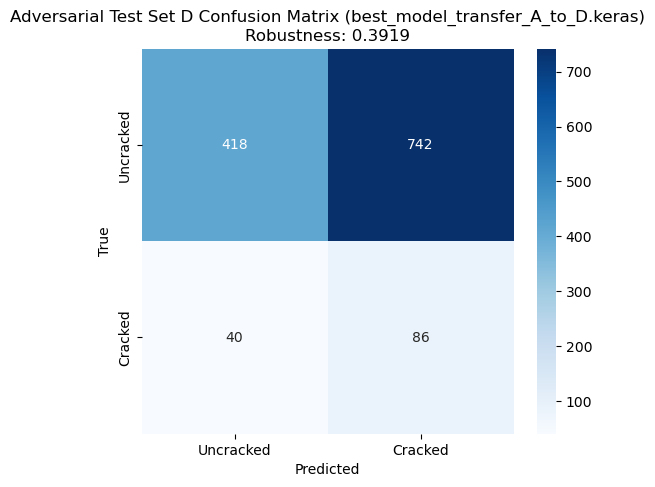



Evaluating model: best_model_transfer_A_to_P.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step
Classification Report on Adversarial Test Set P:
              precision    recall  f1-score   support

   Uncracked       0.84      0.41      0.55      2173
     Cracked       0.06      0.34      0.11       261

    accuracy                           0.40      2434
   macro avg       0.45      0.38      0.33      2434
weighted avg       0.75      0.40      0.50      2434



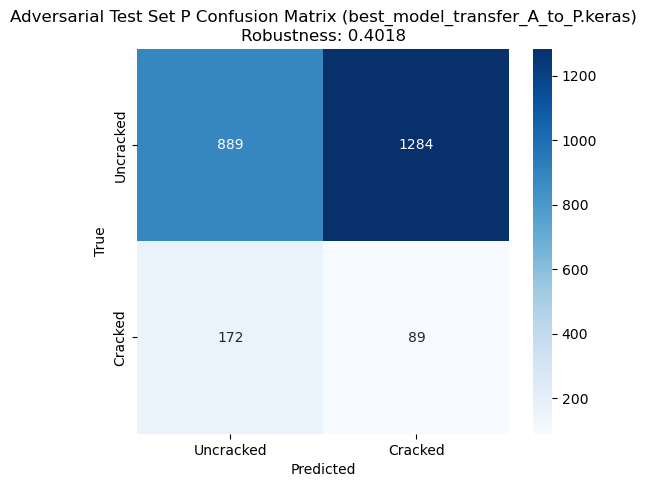



Evaluating model: best_model_transfer_B_to_D.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step
Classification Report on Adversarial Test Set D:
              precision    recall  f1-score   support

   Uncracked       0.89      0.90      0.90      1160
     Cracked       0.03      0.02      0.02       126

    accuracy                           0.81      1286
   macro avg       0.46      0.46      0.46      1286
weighted avg       0.81      0.81      0.81      1286



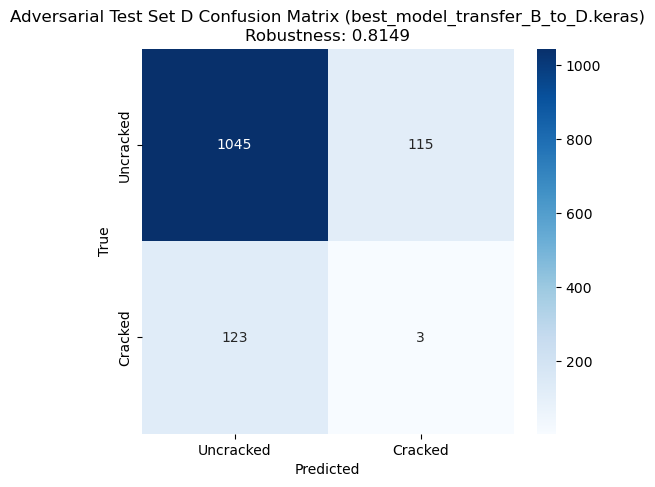



Evaluating model: best_model_transfer_B_to_P.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step
Classification Report on Adversarial Test Set P:
              precision    recall  f1-score   support

   Uncracked       0.84      0.64      0.73      2173
     Cracked       0.01      0.02      0.01       261

    accuracy                           0.57      2434
   macro avg       0.43      0.33      0.37      2434
weighted avg       0.75      0.57      0.65      2434



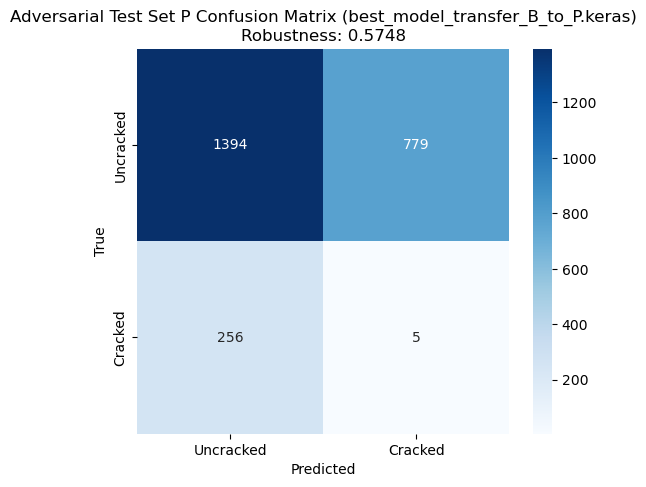



Evaluating model: best_model_transfer_C_to_D.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step
Classification Report on Adversarial Test Set D:
              precision    recall  f1-score   support

   Uncracked       0.85      0.33      0.47      1160
     Cracked       0.07      0.46      0.12       126

    accuracy                           0.34      1286
   macro avg       0.46      0.39      0.30      1286
weighted avg       0.77      0.34      0.44      1286



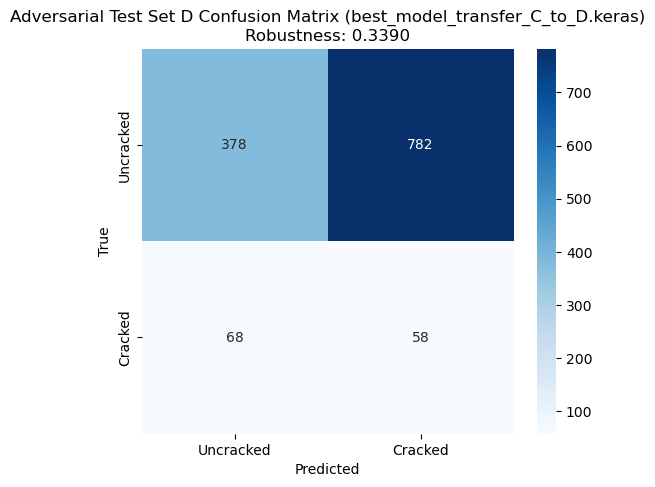



Evaluating model: best_model_transfer_C_to_P.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step
Classification Report on Adversarial Test Set P:
              precision    recall  f1-score   support

   Uncracked       0.74      0.32      0.45      2173
     Cracked       0.01      0.03      0.01       261

    accuracy                           0.29      2434
   macro avg       0.37      0.18      0.23      2434
weighted avg       0.66      0.29      0.40      2434



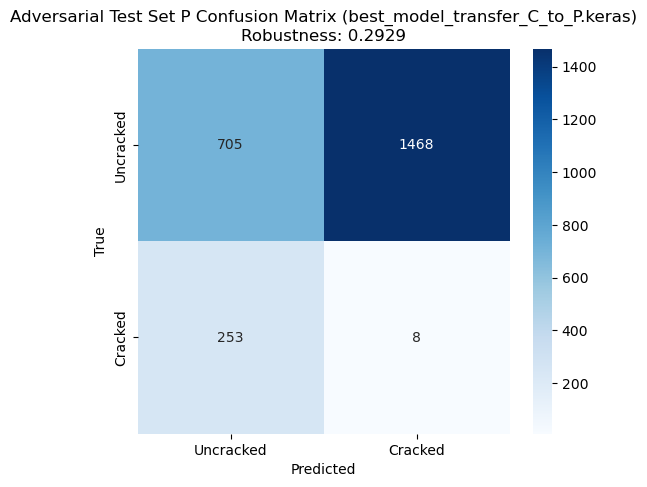

In [4]:
# Paths for pre-saved datasets
test_images_D = np.load('test_set_D_images.npy')
test_labels_D = np.load('test_set_D_labels.npy')
test_images_P = np.load('test_set_P_images.npy')
test_labels_P = np.load('test_set_P_labels.npy')

test_images_D_tensor = tf.convert_to_tensor(test_images_D, dtype=tf.float32)
test_labels_D_tensor = tf.convert_to_tensor(test_labels_D, dtype=tf.int32)
test_images_P_tensor = tf.convert_to_tensor(test_images_P, dtype=tf.float32)
test_labels_P_tensor = tf.convert_to_tensor(test_labels_P, dtype=tf.int32)

bounds = (0, 1)

def evaluate_robustness_and_get_adv_examples(fmodel, images, labels, batch_size=128, epsilon=0.03):
    adv_list = []
    success_list = []
    labels_np = labels.numpy().astype(int)
    labels_tf = tf.convert_to_tensor(labels_np, dtype=tf.int32)

    attack = fb.attacks.FGSM()
    num_samples = len(images)
    for i in range(0, num_samples, batch_size):
        batch_images = images[i : i + batch_size]
        batch_labels = labels_tf[i : i + batch_size]
        
        _, advs, success = attack(fmodel, batch_images, batch_labels, epsilons=epsilon)
        adv_list.append(advs.numpy())
        success_list.append(success.numpy())

    advs_array = np.concatenate(adv_list, axis=0)
    success_array = np.concatenate(success_list, axis=0)
    # Robustness: fraction of samples NOT successfully attacked
    robustness = 1 - np.mean(success_array)
    return advs_array, success_array, labels_np, robustness

def plot_confusion_matrix(y_true, y_pred, robustness, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Uncracked', 'Cracked'], yticklabels=['Uncracked', 'Cracked'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{title}\nRobustness: {robustness:.4f}")
    plt.show()

def evaluate_on_adversarial(model, adversarial_images, labels):
    predictions = model.predict(adversarial_images)
    predicted_labels = np.round(predictions).astype(int).flatten()
    report = classification_report(labels, predicted_labels, target_names=['Uncracked', 'Cracked'])
    return predicted_labels, report

model_paths = [
    'best_model_transfer_A_to_D.keras',
    'best_model_transfer_A_to_P.keras',
    'best_model_transfer_B_to_D.keras',
    'best_model_transfer_B_to_P.keras',
    'best_model_transfer_C_to_D.keras',
    'best_model_transfer_C_to_P.keras'
]

for model_path in model_paths:
    print(f"Evaluating model: {model_path}")
    model = tf.keras.models.load_model(
        model_path,
        custom_objects={'focal_loss_fixed': focal_loss(alpha=1, gamma=0)}
    )
    fmodel = fb.TensorFlowModel(lambda x: tf.concat([1 - model(x), model(x)], axis=-1), bounds=bounds)

    # Determine which test set to use based on model_path
    if model_path.endswith("_to_D.keras"):
        test_images_tensor = test_images_D_tensor
        test_labels = test_labels_D
        test_labels_tensor = test_labels_D_tensor
        test_set_name = "Test Set D"
    elif model_path.endswith("_to_P.keras"):
        test_images_tensor = test_images_P_tensor
        test_labels = test_labels_P
        test_labels_tensor = test_labels_P_tensor
        test_set_name = "Test Set P"
    else:
        # If for some reason it doesn't match, skip
        print("Model name does not match expected pattern (_to_D or _to_P). Skipping.")
        continue

    # Get adversarial examples and robustness
    advs_array, success_array, labels_np, robustness = evaluate_robustness_and_get_adv_examples(
        fmodel, test_images_tensor, test_labels_tensor, epsilon=0.03
    )

    # Evaluate only on adversarial examples
    # If you want to filter by successful attacks only, uncomment the following lines:
    # successful_indices = np.where(success_array)[0]
    # advs_array = advs_array[successful_indices]
    # labels_np = labels_np[successful_indices]

    pred_labels_adv, report_adv = evaluate_on_adversarial(model, advs_array, labels_np)
    print(f"Classification Report on Adversarial {test_set_name}:")
    print(report_adv)

    plot_confusion_matrix(labels_np, pred_labels_adv, robustness, 
                          title=f"Adversarial {test_set_name} Confusion Matrix ({model_path})")

    print("\n==============\n")